In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np

In [2]:
layers_singular_value = torch.load("data/singular_values_llama-2-7b.pt")

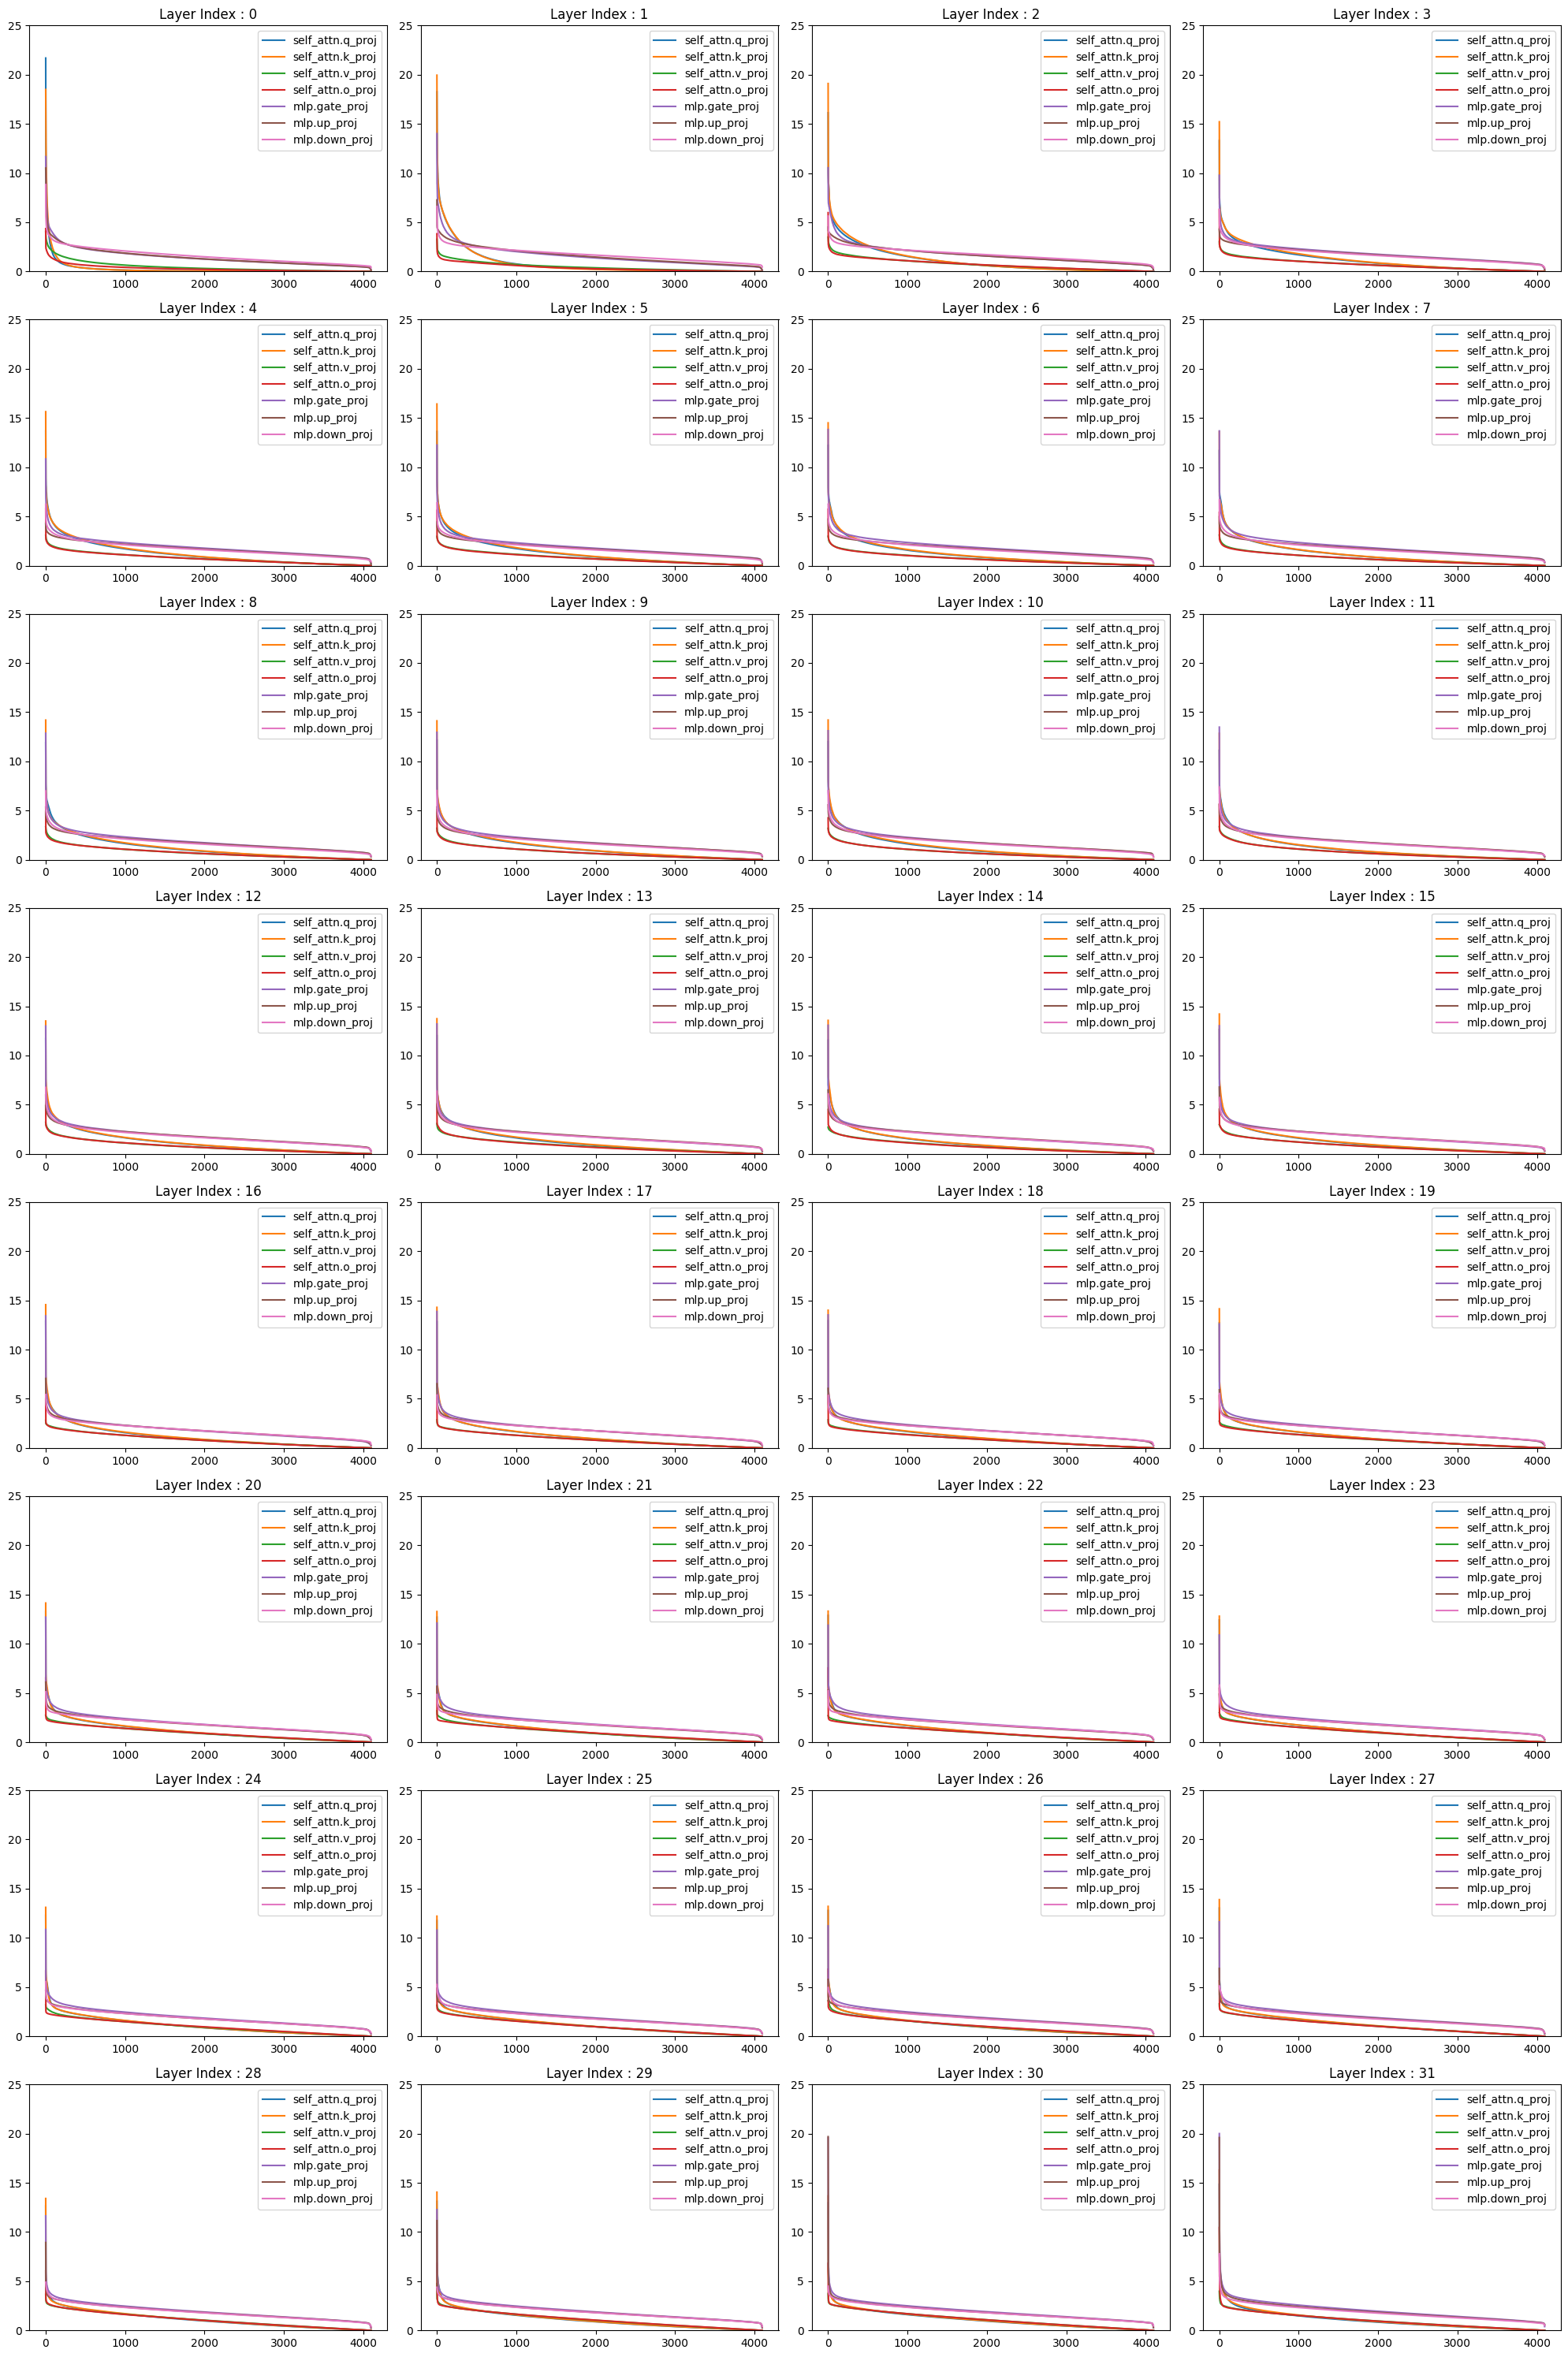

In [29]:
fig, axs = plt.subplots(8, 4,  figsize = (20, 30))
l_width = 3.0
x_label = 18
y_label = 18
legend_size = 16
title_size = 18
marker_size = 50
last = 15
index = 0
for i in range(0, 8):
    for j in range(0, 4):
        layer = layers_singular_value[index]
        subset = list(layer.keys())
        for name in subset:
            data = layer[name].cpu().numpy()
            axs[i, j].plot(np.arange(1, len(data) + 1), data, label = f"{name}")
            axs[i, j].set_title(f"Layer Index : {index}")
            axs[i, j].set_ylim([0, 25])
            axs[i, j].legend()
        index += 1
plt.tight_layout()

In [14]:
rank_pruning = {}
total_rank = 0
pruned_rank = 0
ratio = 0.5
for index in range(0, len(layers_singular_value)):
    layer = layers_singular_value[index]
    subset = list(layer.keys())
    rank_pruning[index] = {}
    for name in subset:
        data = layer[name].cpu().numpy()
        rank_pruning[index][name] = len(data) - sum(data > ratio)
        total_rank += len(data)
        pruned_rank += len(data) - sum(data > ratio)
print(f"Rank Reduction: {(pruned_rank/total_rank)* 100:.3f} %")

Rank Reduction: 21.151 %


: 

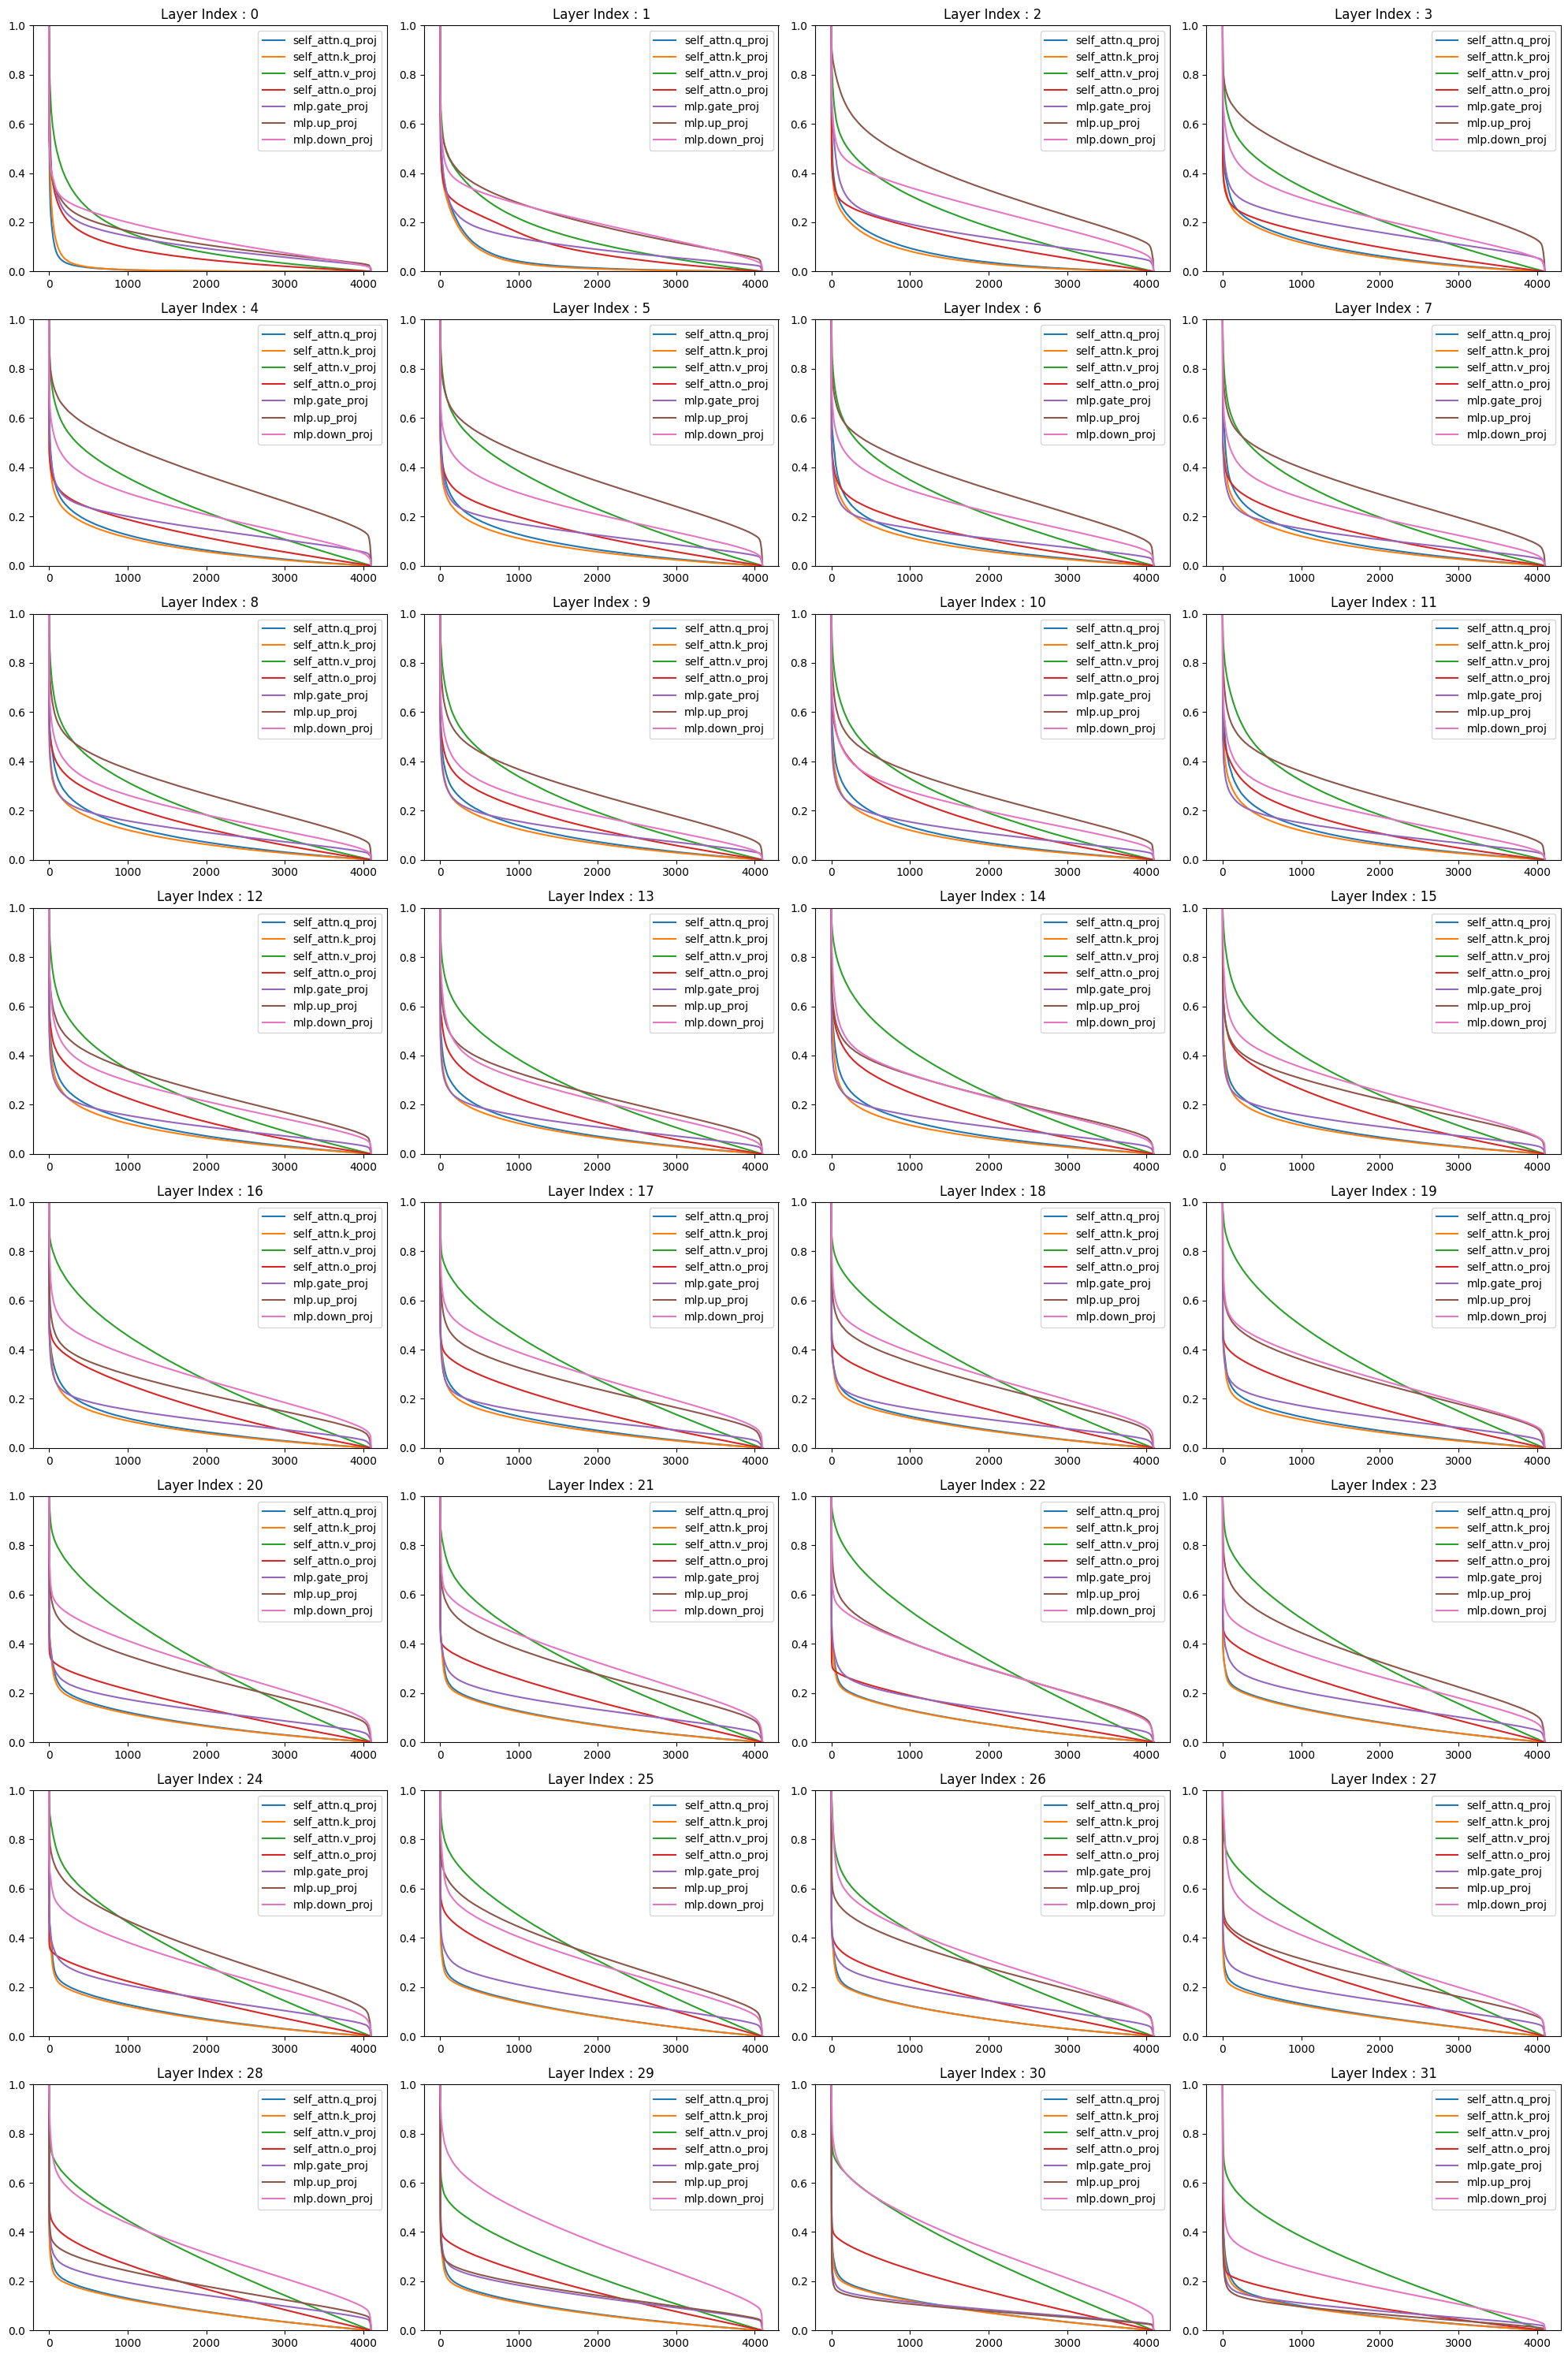

In [4]:
fig, axs = plt.subplots(8, 4,  figsize = (20, 30))
l_width = 3.0
x_label = 18
y_label = 18
legend_size = 16
title_size = 18
marker_size = 50
last = 15
index = 0
for i in range(0, 8):
    for j in range(0, 4):
        layer = layers_singular_value[index]
        subset = list(layer.keys())
        for name in subset:
            data = layer[name].cpu().numpy()
            axs[i, j].plot(np.arange(1, len(data) + 1), (data-min(data))/(max(data)-min(data)), label = f"{name}")
            axs[i, j].set_title(f"Layer Index : {index}")
            axs[i, j].set_ylim([0, 1])
            axs[i, j].legend()
        index += 1
plt.tight_layout()

# Check activation : howmuch it changes with the compression
# whole block it changes

In [11]:
rank_pruning = {}
total_rank = 0
pruned_rank = 0
ratio = 0.0535
for index in range(0, len(layers_singular_value)):
    layer = layers_singular_value[index]
    subset = list(layer.keys())
    rank_pruning[index] = {}
    for name in subset:
        data = layer[name].cpu().numpy()
        data = (data-min(data))/(max(data)-min(data))
        rank_pruning[index][name] = len(data) - sum(data > ratio)
        total_rank += len(data)
        pruned_rank += len(data) - sum(data > ratio)
print(f"Rank Reduction: {(pruned_rank/total_rank)* 100:.3f} %")

Rank Reduction: 21.105 %


In [52]:
sum(data > 1.5)

2533

: 

In [3]:
rank_pruning = torch.load("data/adative_rank.pt")

In [4]:
pruned, total = 0, 0
for i in range(0, 32):
    layer = rank_pruning[i]
    for name in layer.keys():
        pruned += layer[name]
        total += 4096
print((pruned/total) * 100)

7.506452287946429


(0.0, 100.0)

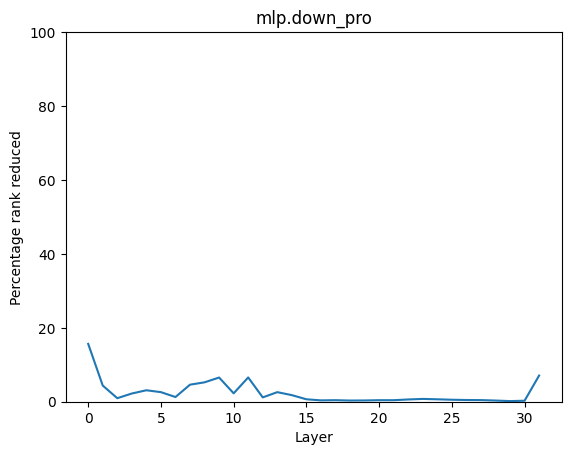

In [14]:
file = open("./logs/Llama-2-7b-chat-hf_singular_value_att_ffn_0.0535.txt", "r")
rank_reduction = []
layer_name = "mlp.down_pro"
for line in file:
    if layer_name in line:
        dropped = float(line.split(": ")[1].replace(" %", ""))
        rank_reduction.append(dropped)

plt.plot(np.arange(0, len(rank_reduction)), rank_reduction)
plt.xlabel("Layer")
plt.ylabel("Percentage rank reduced")
plt.title(layer_name)
plt.ylim([0, 100])